In [1]:
from IPython.display import HTML
HTML('''
<style> 
    body {font-family: "Times New Roman", serif;} 
    h2 {padding: 10px 12px; background-color: #E64626; color: #ffffff; font-size: 40px;} 
    .text_cell_render p { font-size: 15px; } 
    .text_cell_render h1 { font-size: 30px; } 
    h1 {padding: 10px 12px; background-color: #E64626; color: #ffffff; font-size: 40px;} 
    .text_cell_render h3 { padding: 10px 12px; background-color: #0148A4; color: #ffffff; font-size: 20px;} 
    h4:before{ content: "@"; font-family:"Wingdings"; margin-right: 4px;} 
    .text_cell_render h4 {padding: 8px; font-family: "Times New Roman", serif; font-style: italic; background-color: #FFB800; color: #ffffff; font-size: 18px; text-align: center; border-radius: 5px;}
    input[type=submit] {background-color: #E64626; border: solid; border-color: #734036; color: white; padding: 8px 16px; text-decoration: none; margin: 4px 2px; cursor: pointer; border-radius: 20px;}
</style>
''')

# Greater Sydney Analysis Assignment

## Task 1

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon
from geoalchemy2 import Geometry, WKTElement
import matplotlib.pyplot as plt

### 1.1 Businesses

To import and clean the business dataset, we first read in the CSV file, then dropped the unnecessary columns, and converted the entire 'sa2_code' column to the integer type to prevent future issues.

In [3]:
Businesses = pd.read_csv('Businesses.csv')
Businesses.drop(columns=['0_to_50k_businesses', '50k_to_200k_businesses', '200k_to_2m_businesses', '2m_to_5m_businesses', '5m_to_10m_businesses', '10m_or_more_businesses'], inplace=True)
Businesses['sa2_code'] = Businesses['sa2_code'].astype(int)
Businesses

,industry_code,industry_name,sa2_code,sa2_name,total_businesses
0,A,"Agriculture, Forestry and Fishing",101021007,Braidwood,296
1,A,"Agriculture, Forestry and Fishing",101021008,Karabar,9
2,A,"Agriculture, Forestry and Fishing",101021009,Queanbeyan,15
3,A,"Agriculture, Forestry and Fishing",101021010,Queanbeyan - East,3
4,A,"Agriculture, Forestry and Fishing",101021012,Queanbeyan West - Jerrabomberra,16
...,...,...,...,...,...
12212,S,Other Services,128021538,Sutherland - Kirrawee,152
12213,S,Other Services,128021607,Engadine,87
12214,S,Other Services,128021608,Loftus - Yarrawarrah,22
12215,S,Other Services,128021609,Woronora Heights,9


In order to identify all industry types and determine which industries might influence a bustling city, we ran the following code:

In [4]:
distinct_industries = Businesses['industry_name'].unique()
print(distinct_industries)

['Agriculture, Forestry and Fishing' 'Mining' 'Manufacturing'
 'Electricity, Gas, Water and Waste Services' 'Construction'
 'Wholesale Trade' 'Retail Trade' 'Accommodation and Food Services'
 'Transport, Postal and Warehousing'
 'Information Media and Telecommunications'
 'Financial and Insurance Services'
 'Rental, Hiring and Real Estate Services'
 'Professional, Scientific and Technical Services'
 'Administrative and Support Services' 'Public Administration and Safety'
 'Education and Training' 'Health Care and Social Assistance'
 'Arts and Recreation Services' 'Other Services']


### 1.2 Income

To import and clean the income dataset, we first read in the CSV file, then renamed the column containing the SA2 codes to match the column name used in the business table. We then filtered out any rows in the DataFrame that contained the value 'np' in any column and converted the entire 'sa2_code' column to the integer type to prevent future issues.

In [5]:
Income = pd.read_csv('Income.csv')
Income.rename(columns={'sa2_code21': 'sa2_code'}, inplace=True)
Income = Income.loc[Income.isin(['np']).any(axis=1) == False]
Income['sa2_code'] = Income['sa2_code'].astype(int)
Income

,sa2_code,sa2_name,earners,median_age,median_income,mean_income
0,101021007,Braidwood,2467,51,46640,68904
1,101021008,Karabar,5103,42,65564,69672
2,101021009,Queanbeyan,7028,39,63528,69174
3,101021010,Queanbeyan - East,3398,39,66148,74162
4,101021012,Queanbeyan West - Jerrabomberra,8422,44,78630,91981
...,...,...,...,...,...,...
637,128021537,Royal National Park,14,37,36980,47584
638,128021538,Sutherland - Kirrawee,13895,41,64940,74867
639,128021607,Engadine,10239,43,63695,72995
640,128021608,Loftus - Yarrawarrah,4424,45,63087,76440


### 1.3 Polls

To import and clean the polls dataset, we first read in the CSV file, then dropped the rows lacking longitude as we couldn't use the data to obtain an accurate point without it. We then filled the null values with 0 and converted the latitude and longitude values to create a single geometry point for each row. After that, we dropped the unnecessary columns.

In [6]:
Polls = pd.read_csv('Pollingplaces2019.csv')
Polls.dropna(subset=['longitude'], inplace=True)
Polls.fillna(0) 
Polls['geom'] = gpd.points_from_xy(Polls.longitude, Polls.latitude)
Polls.drop(columns=['FID', 'state', 'division_id', 'division_name', 'polling_place_type_id', 'polling_place_name', 'premises_name','premises_address_1','premises_address_2','premises_address_3', 'premises_state_abbreviation', 'latitude', 'longitude', 'the_geom'], inplace=True) 
Polls

,polling_place_id,premises_suburb,premises_post_code,geom
13,58,OATLEY,2223.0,POINT (151.08100 -33.98470)
15,392,DHARRUK,2770.0,POINT (150.81700 -33.74750)
16,31,ALLAWAH,2218.0,POINT (151.11490 -33.97679)
17,67,SOUTH HURSTVILLE,2221.0,POINT (151.11100 -33.97560)
18,56500,BEVERLY HILLS,2209.0,POINT (151.07500 -33.94130)
...,...,...,...,...
2924,2810,WARILLA,2528.0,POINT (150.85177 -34.54724)
2925,2809,BARRACK HEIGHTS,2528.0,POINT (150.85800 -34.56420)
2926,58798,WARILLA,2528.0,POINT (150.85975 -34.55082)
2927,31242,WELBY,2575.0,POINT (150.42400 -34.44090)


### 1.4 Population

To import and clean the population dataset, we first read in the CSV file, then filtered out rows where the total 
population was 100 or fewer. Next, we converted the entire 'sa2_code' column to the integer type to prevent future 
issues.

In [7]:
Population = pd.read_csv('Population.csv')
Population = Population[Population['total_people'] >= 100]
Population['sa2_code'] = Population['sa2_code'].astype(int)
Population

,sa2_code,sa2_name,0-4_people,5-9_people,10-14_people,15-19_people,20-24_people,25-29_people,30-34_people,35-39_people,...,45-49_people,50-54_people,55-59_people,60-64_people,65-69_people,70-74_people,75-79_people,80-84_people,85-and-over_people,total_people
0,102011028,Avoca Beach - Copacabana,424,522,623,552,386,222,306,416,...,572,602,570,520,464,369,226,142,70,7530
1,102011029,Box Head - MacMasters Beach,511,666,702,592,461,347,420,535,...,749,749,794,895,863,925,603,331,264,11052
2,102011030,Calga - Kulnura,200,225,258,278,274,227,214,286,...,325,436,422,397,327,264,190,100,75,4748
3,102011031,Erina - Green Point,683,804,880,838,661,502,587,757,...,859,882,901,930,917,1065,976,773,1028,14803
4,102011032,Gosford - Springfield,1164,1044,1084,1072,1499,1864,1750,1520,...,1330,1241,1377,1285,1166,949,664,476,537,21346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,128021536,Oyster Bay - Como - Jannali,1331,1679,1746,1456,1118,922,1059,1541,...,1861,1522,1319,1189,1084,1046,767,410,439,22151
369,128021538,Sutherland - Kirrawee,1519,1292,1150,1117,1335,1852,2120,1945,...,1569,1391,1285,1157,909,909,781,582,807,23369
370,128021607,Engadine,1157,1283,1469,1209,891,675,928,1229,...,1315,1086,909,764,707,886,748,389,327,17379
371,128021608,Loftus - Yarrawarrah,503,487,575,508,380,293,426,493,...,564,477,450,387,418,335,263,192,109,7354


 ### 1.5 Stops

To import and clean the stops dataset, we first read in the text file, filled the null values with 0, and used the
latitude and longitude values to create a single geometry point for each row. We then specified which rows to 
display in the table.

In [8]:
Stops = pd.read_csv('Stops.txt')
Stops.fillna(0)
Stops['geom'] = gpd.points_from_xy(Stops.stop_lon, Stops.stop_lat)
Stops = Stops[['stop_id','wheelchair_boarding','geom']]
Stops

,stop_id,wheelchair_boarding,geom
0,200039,0,POINT (151.20666 -33.88221)
1,200054,0,POINT (151.20699 -33.88204)
2,200060,0,POINT (151.20629 -33.88408)
3,201510,0,POINT (151.19887 -33.89169)
4,201646,0,POINT (151.19888 -33.89333)
...,...,...,...
114713,212753,1,POINT (151.07880 -33.82202)
114714,2137185,1,POINT (151.11693 -33.84067)
114715,2137186,1,POINT (151.11690 -33.84077)
114716,21501,1,POINT (151.01058 -33.81390)


### 1.6 Greater Sydney SA2 Regions

To import and clean the SA2 dataset, we started by reading in the GeoJSON file and filtered the original GeoDataFrame to only include rows where gccsa_name_2021 matches 'Greater Sydney'. We then created an independent copy of this data, assigning it to the variable GreaterSydney. We also renamed the sa2_code and sa2_name columns to align with previous tables, selected the columns to display, and converted the sa2_code column to integer to ensure consistency and avoid future issues.

In [9]:
gdf = gpd.read_file('SA2.geojson')
GreaterSydney = gdf[gdf['gccsa_name_2021'] == 'Greater Sydney'].copy()
GreaterSydney.rename(columns={'sa2_code_2021': 'sa2_code', 'sa2_name_2021': 'sa2_name'}, inplace=True)
GreaterSydney = GreaterSydney[['sa2_code','sa2_name','st_lengthshape','st_areashape','geometry']]
GreaterSydney['sa2_code'] = GreaterSydney['sa2_code'].astype(int)
GreaterSydney

,sa2_code,sa2_name,st_lengthshape,st_areashape,geometry
28,102011028,Avoca Beach - Copacabana,22285.250826,9.276612e+06,"POLYGON ((151.41373 -33.46559, 151.41336 -33.4..."
29,102011029,Box Head - MacMasters Beach,64281.630343,4.626551e+07,"POLYGON ((151.37484 -33.50053, 151.37474 -33.5..."
30,102011030,Calga - Kulnura,333407.077481,1.103260e+09,"MULTIPOLYGON (((151.08952 -33.32712, 151.08938..."
31,102011031,Erina - Green Point,46665.162610,4.864124e+07,"POLYGON ((151.37193 -33.43699, 151.37100 -33.4..."
32,102011032,Gosford - Springfield,34295.102870,2.434335e+07,"POLYGON ((151.32348 -33.42780, 151.32349 -33.4..."
...,...,...,...,...,...
637,128021537,Royal National Park,112165.519173,2.037681e+08,"POLYGON ((151.07362 -34.05639, 151.07389 -34.0..."
638,128021538,Sutherland - Kirrawee,19078.590449,1.132043e+07,"POLYGON ((151.05006 -34.02159, 151.05004 -34.0..."
639,128021607,Engadine,22109.934099,1.307702e+07,"POLYGON ((150.99568 -34.05362, 150.99566 -34.0..."
640,128021608,Loftus - Yarrawarrah,14771.337168,5.613191e+06,"POLYGON ((151.03954 -34.04176, 151.03954 -34.0..."


### 1.7 Schools

To import and clean the datasets for primary schools, secondary schools, and future schools, we began by reading in the SHP file and selecting the desired columns for display. Additionally, we standardized the column names by converting them all to lowercase to help prevent future case-sensitivity issues.

In [10]:
PrimarySchools = gpd.read_file("catchments_primary.shp")
PrimarySchools = PrimarySchools[['USE_ID','CATCH_TYPE','USE_DESC', 'geometry']]
PrimarySchools.columns = [col.lower() for col in PrimarySchools.columns]
PrimarySchools

,use_id,catch_type,use_desc,geometry
0,2838,PRIMARY,Parklea PS,"POLYGON ((150.93564 -33.71612, 150.93715 -33.7..."
1,2404,PRIMARY,Lindfield EPS,"POLYGON ((151.18336 -33.74748, 151.18443 -33.7..."
2,4393,PRIMARY,Carlingford WPS,"POLYGON ((151.04518 -33.77303, 151.04526 -33.7..."
3,4615,PRIMARY,Caddies Ck PS,"POLYGON ((150.92567 -33.72960, 150.92602 -33.7..."
4,3918,PRIMARY,Killara PS,"POLYGON ((151.15379 -33.75586, 151.15404 -33.7..."
...,...,...,...,...
1657,4383,PRIMARY,E A Southee PS,"POLYGON ((147.94621 -34.55863, 147.95292 -34.5..."
1658,3275,PRIMARY,Tumbarumba PS,"POLYGON ((148.12885 -35.60082, 148.23155 -35.6..."
1659,2239,PRIMARY,Jindera PS,"POLYGON ((146.86148 -35.87511, 146.87402 -35.8..."
1660,3594,PRIMARY,Louth PS,"POLYGON ((145.18403 -29.65805, 145.18434 -29.6..."


In [11]:
SecondarySchools = gpd.read_file("catchments_secondary.shp")
SecondarySchools = SecondarySchools[['USE_ID','CATCH_TYPE','USE_DESC', 'geometry']]
SecondarySchools.columns = [col.lower() for col in SecondarySchools.columns]
SecondarySchools

,use_id,catch_type,use_desc,geometry
0,8503,HIGH_COED,Billabong HS,"POLYGON ((146.67182 -35.31444, 146.68930 -35.3..."
1,8266,HIGH_COED,James Fallon HS,"POLYGON ((147.08734 -35.86271, 147.10413 -35.8..."
2,8505,HIGH_COED,Murray HS,"POLYGON ((146.81448 -35.78341, 146.81250 -35.7..."
3,8458,HIGH_COED,Kingswood HS,"MULTIPOLYGON (((150.68600 -33.74031, 150.68631..."
4,8559,HIGH_COED,Jamison HS,"POLYGON ((150.69513 -33.75627, 150.68936 -33.7..."
...,...,...,...,...
431,8213,HIGH_BOYS,Birrong BHS,"POLYGON ((151.05364 -33.85076, 151.06142 -33.8..."
432,8108,HIGH_COED,Cessnock HS,"POLYGON ((151.42852 -32.74415, 151.43080 -32.7..."
433,3235,CENTRAL_HIGH,Tooleybuc CS,"POLYGON ((143.37723 -34.80173, 143.39037 -34.8..."
434,1115,CENTRAL_HIGH,Balranald CS,"POLYGON ((143.65541 -33.55702, 143.65541 -33.5..."


In [12]:
FutureSchools = gpd.read_file("catchments_future.shp")
FutureSchools = FutureSchools[['USE_ID', 'CATCH_TYPE', 'USE_DESC', 'geometry']]
FutureSchools.columns = [col.lower() for col in FutureSchools.columns]
FutureSchools

,use_id,catch_type,use_desc,geometry
0,8416,HIGH_COED,Ku-ring-gai HS,"POLYGON ((151.19849 -33.53990, 151.19945 -33.5..."
1,8161,HIGH_BOYS,Randwick BHS,"POLYGON ((151.27152 -33.91402, 151.27152 -33.9..."
2,8539,HIGH_COED,SSC Blackwattle Bay,"POLYGON ((151.15292 -33.83939, 151.16144 -33.8..."
3,8400,HIGH_COED,St Ives HS,"POLYGON ((151.17794 -33.69820, 151.17859 -33.6..."
4,8555,HIGH_COED,Rose Bay SC,"POLYGON ((151.28072 -33.83287, 151.28095 -33.8..."
5,8556,CENTRAL_HIGH,Alexandria Park CS,"POLYGON ((151.19497 -33.88876, 151.19524 -33.8..."
6,8913,HIGH_COED,Inner Sydney HS,"POLYGON ((151.20982 -33.85423, 151.21071 -33.8..."
7,8286,HIGH_COED,Mt Annan HS,"POLYGON ((150.77298 -34.02516, 150.77487 -34.0..."
8,8584,HIGH_COED,Elizabeth Macarthur HS,"POLYGON ((150.73235 -34.01466, 150.73326 -34.0..."
9,8290,HIGH_COED,John Edmondson HS,"MULTIPOLYGON (((150.70497 -33.90426, 150.71625..."


### 1.8 Geospatial Data Processing and Standardization

For the polls and stops datasets, we modified the geometry data for later use. Our approach involved applying a lambda function that transforms existing geometries into a WKTElement, complete with a specified spatial reference identifier (srid). This transformation ensures compatibility with spatial databases and adherence to specific projection requirements.

In [13]:
srid = 4283

In [14]:
Polls['geom'] = Polls['geom'].apply(lambda x: WKTElement(x.wkt, srid=srid))
Polls
print(Polls['geom'].head())

13           POINT (151.081 -33.9847)
15           POINT (150.817 -33.7475)
16    POINT (151.1148974 -33.9767897)
17           POINT (151.111 -33.9756)
18           POINT (151.075 -33.9413)
Name: geom, dtype: object


In [15]:
Stops['geom'] = Stops['geom'].apply(lambda x: WKTElement(x.wkt, srid=srid))
Stops
print(Stops['geom'].head())

0     POINT (151.20666465471 -33.8822064874687)
1     POINT (151.20699145565 -33.8820421431408)
2    POINT (151.206292455081 -33.8840842535493)
3    POINT (151.198866071817 -33.8916900512711)
4    POINT (151.198881722942 -33.8933293130144)
Name: geom, dtype: object


This function handles geometry objects by checking if the geometry is a 'Polygon'. If it is, it converts it into a MultiPolygon to normalize the geometry types for better database compatibility. The function then returns a WKTElement, which represents the geometry in Well-Known Text format along with an assigned SRID.

In [16]:
def create_wkt_element(geom, srid):
    if geom.geom_type == 'Polygon':
        geom = MultiPolygon([geom])
    return WKTElement(geom.wkt, srid)

For each dataset—GreaterSydney, PrimarySchools, SecondarySchools, and FutureSchools—we performed a series of operations. Initially, we made copies of each dataset to preserve the original data. We then transformed the 'geometry' column in each copy using our create_wkt_element function, standardizing it to a specific spatial reference. After the transformation, we removed the original 'geometry' column to eliminate redundancy and potential errors in future data handling, and we printed the first few entries of the modified 'geom' column to verify the changes.

In [17]:
GreaterSydneyog = GreaterSydney.copy()  # creating a copy of the original for later
GreaterSydney['geom'] = GreaterSydney['geometry'].apply(lambda x: create_wkt_element(geom=x,srid=srid))  # applying the function
GreaterSydney = GreaterSydney.drop(columns="geometry")  # deleting the old copy
print(GreaterSydney['geom'].head())

28    MULTIPOLYGON (((151.4137275681688 -33.46559325...
29    MULTIPOLYGON (((151.3748353582858 -33.50053263...
30    MULTIPOLYGON (((151.08952354834426 -33.3271196...
31    MULTIPOLYGON (((151.37193064772976 -33.4369917...
32    MULTIPOLYGON (((151.32348091838256 -33.4277979...
Name: geom, dtype: object


In [18]:
PrimarySchoolsog = PrimarySchools.copy()  # creating a copy of the original for later
PrimarySchools['geom'] = PrimarySchools['geometry'].apply(lambda x: create_wkt_element(geom=x,srid=srid))  # applying the function
PrimarySchools = PrimarySchools.drop(columns="geometry")  # deleting the old copy
PrimarySchools
print(PrimarySchools['geom'].head())

0    MULTIPOLYGON (((150.93563850416004 -33.7161211...
1    MULTIPOLYGON (((151.1833640465581 -33.74748398...
2    MULTIPOLYGON (((151.0451821055135 -33.77303212...
3    MULTIPOLYGON (((150.92567327976582 -33.7296030...
4    MULTIPOLYGON (((151.1537883781186 -33.75586174...
Name: geom, dtype: object


In [19]:
SecondarySchoolsog = SecondarySchools.copy()  # creating a copy of the original for later
SecondarySchools['geom'] = SecondarySchools['geometry'].apply(lambda x: create_wkt_element(geom=x,srid=srid))  # applying the function
SecondarySchools = SecondarySchools.drop(columns="geometry")  # deleting the old copy
print(SecondarySchools['geom'].head())

0    MULTIPOLYGON (((146.67182402032344 -35.3144375...
1    MULTIPOLYGON (((147.08733806259178 -35.8627146...
2    MULTIPOLYGON (((146.81447829547324 -35.7834062...
3    MULTIPOLYGON (((150.68599834118749 -33.7403060...
4    MULTIPOLYGON (((150.69513440644116 -33.7562688...
Name: geom, dtype: object


In [20]:
FutureSchoolsog = FutureSchools.copy()  # creating a copy of the original for later
FutureSchools['geom'] = FutureSchools['geometry'].apply(lambda x: create_wkt_element(geom=x,srid=srid))  # applying the function
FutureSchools = FutureSchools.drop(columns="geometry")  # deleting the old copy
print(FutureSchools['geom'].head())

0    MULTIPOLYGON (((151.19848917708944 -33.5398987...
1    MULTIPOLYGON (((151.27151530428182 -33.9140183...
2    MULTIPOLYGON (((151.15292370935092 -33.8393921...
3    MULTIPOLYGON (((151.17793729938725 -33.6982001...
4    MULTIPOLYGON (((151.28072275958445 -33.8328728...
Name: geom, dtype: object


### Database Connection

In [21]:
from sqlalchemy import create_engine, text
import psycopg2
import psycopg2.extras
import json
import os

credentials = "Credentials.json"

def pgconnect(credential_filepath, db_schema="public"):
    with open(credential_filepath) as f:
        db_conn_dict = json.load(f)
        host       = db_conn_dict['host']
        db_user    = db_conn_dict['user']
        db_pw      = db_conn_dict['password']
        default_db = db_conn_dict['user']
        try:
            db = create_engine('postgresql+psycopg2://'+db_user+':'+db_pw+'@'+host+'/'+default_db, echo=False)
            conn = db.connect()
            print('Connected successfully.')
        except Exception as e:
            print("Unable to connect to the database.")
            print(e)
            db, conn = None, None
        return db,conn

def query(conn, sqlcmd, args=None, df=True):
    result = pd.DataFrame() if df else None
    try:
        if df:
            result = pd.read_sql_query(sqlcmd, conn, params=args)
        else:
            result = conn.execute(text(sqlcmd), args).fetchall()
            result = result[0] if len(result) == 1 else result
    except Exception as e:
        print("Error encountered: ", e, sep='\n')
    return result

In [22]:
db, conn = pgconnect(credentials)

Connected successfully.


In [23]:
query(conn, "select PostGIS_Version()")

,postgis_version
0,3.3 USE_GEOS=1 USE_PROJ=1 USE_STATS=1


In [24]:
conn.execute(text("create schema if not exists gsd"))
conn.execute(text("set search_path to gsd"))

### Database Table Creation and Data Insertion

In [27]:
import shapely
from shapely import wkt, Point, Polygon, MultiPolygon
from shapely.geometry import Point, Polygon, MultiPolygon
from geoalchemy2 import Geometry, WKTElement
import matplotlib.pyplot as plt

conn.execute(text("""
DROP TABLE IF EXISTS Businesses;
DROP TABLE IF EXISTS Income;
DROP TABLE IF EXISTS Population;
DROP TABLE IF EXISTS Polls;
DROP TABLE IF EXISTS Stops;
DROP TABLE IF EXISTS GreaterSydney;
DROP TABLE IF EXISTS PrimarySchools;
DROP TABLE IF EXISTS SecondarySchools;
DROP TABLE IF EXISTS FutureSchools;

CREATE TABLE businesses(
    businesses_id SERIAL PRIMARY KEY,
   industry_code VARCHAR(1),
   industry_name VARCHAR(1000),
   sa2_code INTEGER,
   sa2_name VARCHAR(1000),
   total_businesses INTEGER   
);
CREATE TABLE income(
   income_id SERIAL PRIMARY KEY,
   sa2_code INTEGER,
   sa2_name VARCHAR(1000),
   earners INTEGER,
   median_age INTEGER,
   median_income INTEGER,
   mean_income INTEGER
);
CREATE TABLE population(
    population_id SERIAL PRIMARY KEY,
   sa2_code INTEGER,
   sa2_name VARCHAR(1000),
   "0-4_people" INTEGER,
    "5-9_people" INTEGER,
    "10-14_people" INTEGER,
    "15-19_people" INTEGER,
    "20-24_people" INTEGER,
    "25-29_people" INTEGER,
    "30-34_people" INTEGER,
    "35-39_people" INTEGER,
    "40-44_people" INTEGER,
    "45-49_people" INTEGER,
    "50-54_people" INTEGER,
    "55-59_people" INTEGER,
    "60-64_people" INTEGER,
    "65-69_people" INTEGER,
    "70-74_people" INTEGER,
    "75-79_people" INTEGER,
    "80-84_people" INTEGER,
    "85-and-over_people" INTEGER,
   total_people INTEGER
);
CREATE TABLE polls(
   polling_place_id INTEGER PRIMARY KEY,
   premises_suburb varchar(1000),
   premises_post_code FLOAT,
   geom Geometry(POINT, 4283)
);
CREATE TABLE stops(
   stop_id varchar(1000) PRIMARY KEY,
   wheelchair_boarding INTEGER,
   geom Geometry(POINT, 4283)
);

CREATE TABLE greaterSydney(
    sa2_code INTEGER PRIMARY KEY,
    sa2_name VARCHAR(1000),
    st_lengthshape FLOAT,
    st_areashape FLOAT,
    geom Geometry(MULTIPOLYGON, 4283)
);
CREATE TABLE primarySchools(
    use_id INTEGER PRIMARY KEY,
    catch_type VARCHAR(1000),
    use_desc VARCHAR(1000),
    geometry Geometry(MULTIPOLYGON, 4283)
);

CREATE TABLE secondarySchools(
    use_id INTEGER PRIMARY KEY,
    catch_type VARCHAR(1000),
    use_desc VARCHAR(1000),
    geometry Geometry(MULTIPOLYGON, 4283)
);
CREATE TABLE futureSchools(
    use_id INTEGER PRIMARY KEY,
    catch_type VARCHAR(1000),
    use_desc VARCHAR(1000),
    geometry Geometry(MULTIPOLYGON, 4283)
);
"""))

Businesses.to_sql("businesses", con=conn, if_exists='append', index=False)
Income.to_sql("income", con=conn, if_exists='append', index=False)
Polls.to_sql("polls", conn, if_exists='append', index=False, dtype={'geom': Geometry('POINT', srid)})
Population.to_sql("population", con=conn, if_exists='append', index=False)
Stops.to_sql("stops", conn, if_exists='append', index=False, dtype={'geom': Geometry('POINT', srid)})
GreaterSydney.to_sql("greaterSydney", conn, if_exists='append', index=False, dtype={'geom': Geometry('MULTIPOLYGON', srid)})
PrimarySchools.to_sql("primarySchools", conn, if_exists='append', index=False, dtype={'geom': Geometry('MULTIPOLYGON', srid)})
SecondarySchools.to_sql("secondarySchools", conn, if_exists='append', index=False, dtype={'geom': Geometry('MULTIPOLYGON', srid)})
FutureSchools.to_sql("futureSchools", conn, if_exists='append', index=False, dtype={'geom': Geometry('MULTIPOLYGON', srid)})


30

## Task 2

### 2.1 SQL Queries

The following SQL code was written and executed to calculate the z-scores for businesses, stops, polls, and schools. The code is duplicated to save the output results into variable names for later use.

In [28]:
sql = """
WITH SelectedIndustryBusinesses AS (
    SELECT b.sa2_code,
           SUM(CASE WHEN b.industry_name IN (
                                    	'Retail Trade',
                                        'Accommodation and Food Services',
                                        'Transport, Postal and Warehousing',
                                        'Financial and Insurance Services',
                                        'Public Administration and Safety',
                                        'Education and Training',
                                        'Health Care and Social Assistance',
                                        'Arts and Recreation Services'
                                        ) THEN b.total_businesses ELSE 0 END) AS total_businesses,
           p.total_people
    FROM gsd.businesses b
    JOIN gsd.population p ON b.sa2_code = p.sa2_code
    WHERE p.total_people >= 100
    GROUP BY b.sa2_code, p.total_people
),

ZscoreBusinesses AS (
    SELECT sa2_code,
           total_people,
           total_businesses,
           CASE
               WHEN total_people = 0 THEN 0  -- Return 0 if the population is 0
               ELSE total_businesses / (total_people / 1000.0)
           END AS businesses_per_1000_people,
           CASE
               WHEN STDDEV(total_businesses) OVER () = 0 THEN 0  -- Return 0 if the standard deviation is 0
               ELSE (total_businesses - AVG(total_businesses) OVER ()) / STDDEV(total_businesses) OVER ()
           END AS z_business
    FROM SelectedIndustryBusinesses
)
SELECT sa2_code,
       businesses_per_1000_people,
       z_business
FROM ZscoreBusinesses
ORDER BY sa2_code;
"""

query(conn, sql)


,sa2_code,businesses_per_1000_people,z_business
0,102011028,31.606906,-0.431622
1,102011029,22.891784,-0.413500
2,102011030,53.917439,-0.409876
3,102011031,47.895697,0.137404
4,102011032,41.459758,0.350034
...,...,...,...
355,128021536,20.405399,-0.173084
356,128021538,30.767256,0.149485
357,128021607,18.700731,-0.326516
358,128021608,16.181670,-0.575389


In [29]:
sql = """
WITH stop_counts AS (
    SELECT gs.sa2_code, COUNT(stops.stop_id) AS num_stops_within_region
    FROM gsd."greaterSydney" gs
    LEFT JOIN gsd.stops ON ST_Contains(gs.geom, stops.geom)
    GROUP BY gs.sa2_code
),
filtered_regions AS (
    SELECT gs.sa2_code, stop_counts.num_stops_within_region
    FROM gsd."greaterSydney" gs
    INNER JOIN stop_counts ON gs.sa2_code = stop_counts.sa2_code
    INNER JOIN gsd.population p ON gs.sa2_code = p.sa2_code
    WHERE p.total_people >= 100
)
SELECT 
    sa2_code,
    num_stops_within_region,
    (num_stops_within_region - AVG(num_stops_within_region) OVER ()) / STDDEV(num_stops_within_region) OVER () AS z_score
FROM filtered_regions;
"""

query(conn, sql)

,sa2_code,num_stops_within_region,z_score
0,102011028,127,-0.311246
1,102011029,214,0.712620
2,102011030,172,0.218340
3,102011031,285,1.548188
4,102011032,355,2.371988
...,...,...,...
355,128011602,149,-0.052337
356,128011603,127,-0.311246
357,128011604,243,1.053908
358,128021608,144,-0.111180


In [30]:
sql = """
WITH PollingPlaceCounts AS (
    SELECT
        gs.sa2_code,
        COUNT(p.polling_place_id) AS polling_place_count
    FROM
        gsd."greaterSydney" gs
    LEFT JOIN
        gsd.polls p ON ST_Contains(gs.geom, p.geom) -- check polling place is inside greaterSydney
    GROUP BY
        gs.sa2_code
),
ZscorePollingPlaces AS (
    SELECT
        ppc.sa2_code,
        ppc.polling_place_count,
        CASE
            WHEN ppc.polling_place_count = 0 THEN 0
            ELSE (ppc.polling_place_count - AVG(ppc.polling_place_count) OVER ()) / STDDEV(ppc.polling_place_count) OVER ()
        END AS z_score
    FROM
        PollingPlaceCounts ppc
    JOIN
        Population pop ON ppc.sa2_code = pop.sa2_code
    WHERE
        pop.total_people >= 100
)
SELECT * FROM ZscorePollingPlaces
ORDER BY sa2_code;
"""

query(conn, sql)

,sa2_code,polling_place_count,z_score
0,102011028,2,-0.536177
1,102011029,2,-0.536177
2,102011030,7,0.674763
3,102011031,6,0.432575
4,102011032,7,0.674763
...,...,...,...
355,128021536,7,0.674763
356,128021538,6,0.432575
357,128021607,7,0.674763
358,128021608,2,-0.536177


In [31]:
sql = """
WITH school_counts AS (
    SELECT 
        gs.sa2_code,
		gs.sa2_name,
        COUNT(DISTINCT(ps.use_id)) AS num_primary_schools,
        COUNT(DISTINCT(ss.use_id)) AS num_secondary_schools,
        COUNT(DISTINCT(fs.use_id)) AS num_future_schools
    FROM 
        gsd."greaterSydney" gs
    LEFT JOIN 
        gsd."primarySchools" ps ON ST_Intersects(gs.geom, ps.geom)
    LEFT JOIN 
        gsd."secondarySchools" ss ON ST_Intersects(gs.geom, ss.geom)
    LEFT JOIN 
        gsd."futureSchools" fs ON ST_Intersects(gs.geom, fs.geom)
    GROUP BY 
        gs.sa2_code, gs.sa2_name
),
young_people_counts AS (
    SELECT 
        p.sa2_code,
		p.sa2_name,
        SUM(p."0-4_people" + p."5-9_people" + p."10-14_people" + p."15-19_people") AS total_young_people
    FROM 
        gsd.population p
    GROUP BY 
        p.sa2_code, p.sa2_name
)
SELECT 
    sc.sa2_code,
	sc.sa2_name,
    sc.num_primary_schools,
    sc.num_secondary_schools,
    sc.num_future_schools,
    ypc.total_young_people,
    (sc.num_primary_schools + sc.num_secondary_schools + sc.num_future_schools) / (ypc.total_young_people / 1000.0) AS schools_per_1000_young_people,
    (sc.num_primary_schools + sc.num_secondary_schools + sc.num_future_schools - AVG(sc.num_primary_schools + sc.num_secondary_schools + sc.num_future_schools) OVER ()) / STDDEV(sc.num_primary_schools + sc.num_secondary_schools + sc.num_future_schools) OVER () AS z_score
FROM 
    school_counts sc
JOIN 
    young_people_counts ypc ON sc.sa2_code = ypc.sa2_code
JOIN 
    gsd."greaterSydney" gs ON sc.sa2_code = gs.sa2_code;

"""

query(conn, sql)

,sa2_code,sa2_name,num_primary_schools,num_secondary_schools,num_future_schools,total_young_people,schools_per_1000_young_people,z_score
0,102011028,Avoca Beach - Copacabana,4,2,0,2121,2.828854,-1.289517
1,102011029,Box Head - MacMasters Beach,4,3,0,2471,2.832861,-1.077928
2,102011030,Calga - Kulnura,17,9,0,961,27.055151,2.942261
3,102011031,Erina - Green Point,10,7,0,3205,5.304212,1.037961
4,102011032,Gosford - Springfield,10,4,0,4364,3.208066,0.403194
...,...,...,...,...,...,...,...,...
355,128021536,Oyster Bay - Como - Jannali,10,4,0,6212,2.253703,0.403194
356,128021538,Sutherland - Kirrawee,11,5,0,5078,3.150847,0.826372
357,128021607,Engadine,7,5,0,5118,2.344666,-0.019983
358,128021608,Loftus - Yarrawarrah,4,3,0,2073,3.376749,-1.077928


In [32]:
business_data = pd.read_sql_query("""
WITH SelectedIndustryBusinesses AS (
    SELECT b.sa2_code,
           SUM(CASE WHEN b.industry_name IN (
                                    	'Retail Trade',
                                        'Accommodation and Food Services',
                                        'Transport, Postal and Warehousing',
                                        'Financial and Insurance Services',
                                        'Public Administration and Safety',
                                        'Education and Training',
                                        'Health Care and Social Assistance',
                                        'Arts and Recreation Services'
                                        ) THEN b.total_businesses ELSE 0 END) AS total_businesses,
           p.total_people
    FROM gsd.businesses b
    JOIN gsd.population p ON b.sa2_code = p.sa2_code
    WHERE p.total_people >= 100
    GROUP BY b.sa2_code, p.total_people
),

ZscoreBusinesses AS (
    SELECT sa2_code,
           total_people,
           total_businesses,
           CASE
               WHEN total_people = 0 THEN 0  -- Return 0 if the population is 0
               ELSE total_businesses / (total_people / 1000.0)
           END AS businesses_per_1000_people,
           CASE
               WHEN STDDEV(total_businesses) OVER () = 0 THEN 0  -- Return 0 if the standard deviation is 0
               ELSE (total_businesses - AVG(total_businesses) OVER ()) / STDDEV(total_businesses) OVER ()
           END AS z_business
    FROM SelectedIndustryBusinesses
)
SELECT sa2_code,
       businesses_per_1000_people,
       z_business
FROM ZscoreBusinesses
ORDER BY sa2_code;
""", conn)


In [33]:
stops_data = pd.read_sql_query("""
WITH stop_counts AS (
    SELECT gs.sa2_code, COUNT(stops.stop_id) AS num_stops_within_region
    FROM gsd."greaterSydney" gs
    LEFT JOIN gsd.stops ON ST_Contains(gs.geom, stops.geom)
    GROUP BY gs.sa2_code
),
filtered_regions AS (
    SELECT gs.sa2_code, stop_counts.num_stops_within_region
    FROM gsd."greaterSydney" gs
    INNER JOIN stop_counts ON gs.sa2_code = stop_counts.sa2_code
    INNER JOIN gsd.population p ON gs.sa2_code = p.sa2_code
    WHERE p.total_people >= 100
)
SELECT 
    sa2_code,
    num_stops_within_region,
    (num_stops_within_region - AVG(num_stops_within_region) OVER ()) / STDDEV(num_stops_within_region) OVER () AS z_score
FROM filtered_regions;
""", conn)


In [34]:
polls_data = pd.read_sql_query("""
WITH PollingPlaceCounts AS (
    SELECT
        gs.sa2_code,
        COUNT(p.polling_place_id) AS polling_place_count
    FROM
        gsd."greaterSydney" gs
    LEFT JOIN
        gsd.polls p ON ST_Contains(gs.geom, p.geom) -- check polling place is inside greaterSydney
    GROUP BY
        gs.sa2_code
),
ZscorePollingPlaces AS (
    SELECT
        ppc.sa2_code,
        ppc.polling_place_count,
        CASE
            WHEN ppc.polling_place_count = 0 THEN 0
            ELSE (ppc.polling_place_count - AVG(ppc.polling_place_count) OVER ()) / STDDEV(ppc.polling_place_count) OVER ()
        END AS z_score
    FROM
        PollingPlaceCounts ppc
    JOIN
        Population pop ON ppc.sa2_code = pop.sa2_code
    WHERE
        pop.total_people >= 100
)
SELECT * FROM ZscorePollingPlaces
ORDER BY sa2_code;
""", conn)

In [35]:
schools_data = pd.read_sql_query("""
WITH school_counts AS (
    SELECT 
        gs.sa2_code,
		gs.sa2_name,
        COUNT(DISTINCT(ps.use_id)) AS num_primary_schools,
        COUNT(DISTINCT(ss.use_id)) AS num_secondary_schools,
        COUNT(DISTINCT(fs.use_id)) AS num_future_schools
    FROM 
        gsd."greaterSydney" gs
    LEFT JOIN 
        gsd."primarySchools" ps ON ST_Intersects(gs.geom, ps.geom)
    LEFT JOIN 
        gsd."secondarySchools" ss ON ST_Intersects(gs.geom, ss.geom)
    LEFT JOIN 
        gsd."futureSchools" fs ON ST_Intersects(gs.geom, fs.geom)
    GROUP BY 
        gs.sa2_code, gs.sa2_name
),
young_people_counts AS (
    SELECT 
        p.sa2_code,
		p.sa2_name,
        SUM(p."0-4_people" + p."5-9_people" + p."10-14_people" + p."15-19_people") AS total_young_people
    FROM 
        gsd.population p
    GROUP BY 
        p.sa2_code, p.sa2_name
)
SELECT 
    sc.sa2_code,
	sc.sa2_name,
    sc.num_primary_schools,
    sc.num_secondary_schools,
    sc.num_future_schools,
    ypc.total_young_people,
    (sc.num_primary_schools + sc.num_secondary_schools + sc.num_future_schools) / (ypc.total_young_people / 1000.0) AS schools_per_1000_young_people,
    (sc.num_primary_schools + sc.num_secondary_schools + sc.num_future_schools - AVG(sc.num_primary_schools + sc.num_secondary_schools + sc.num_future_schools) OVER ()) / STDDEV(sc.num_primary_schools + sc.num_secondary_schools + sc.num_future_schools) OVER () AS z_score
FROM 
    school_counts sc
JOIN 
    young_people_counts ypc ON sc.sa2_code = ypc.sa2_code
JOIN 
    gsd."greaterSydney" gs ON sc.sa2_code = gs.sa2_code;
""", conn)

### 2.2 Score Calculation

We calculated a 'bustling' score for each neighborhood by aggregating z-scores from multiple datasets. After summing these z-scores, we applied a sigmoid function to scale the combined z-scores into a [0, 1] range, making the scores easier to interpret and compare. The final scores are then compiled into a new DataFrame alongside their corresponding SA2 codes and names for further analysis.

In [36]:
import math
import numpy as np
combined_zscores = business_data['z_business'] + stops_data['z_score'] + polls_data['z_score'] + schools_data['z_score']

# Apply sigmoid function
score = 1 / (1 + np.exp(-combined_zscores))

# Add the calculated score to the original data frame or create a new one
result_df = pd.DataFrame({'sa2_code': business_data['sa2_code'], 'sa2_name': schools_data['sa2_name'],'score': score})
result_df

,sa2_code,sa2_name,score
0,102011028,Avoca Beach - Copacabana,0.071189
1,102011029,Box Head - MacMasters Beach,0.211654
2,102011030,Calga - Kulnura,0.968492
3,102011031,Erina - Green Point,0.959150
4,102011032,Gosford - Springfield,0.978118
...,...,...,...
355,128021536,Oyster Bay - Como - Jannali,0.701099
356,128021538,Sutherland - Kirrawee,0.749732
357,128021607,Engadine,0.799340
358,128021608,Loftus - Yarrawarrah,0.091067


### Database Operations: Creating and Populating the Scores Table

In [38]:
conn.execute(text("""
DROP TABLE IF EXISTS Scores;

CREATE TABLE scores(
   sa2_code INTEGER,
   sa2_name VARCHAR(1000),
   score FLOAT   
);
"""))

result_df.to_sql("scores", con=conn, if_exists='append', index=False)

360

### 2.3 New Scores Accounting for Area & Population

After reviewing the scores for each SA2 region, we realized that some regions scored higher simply because they covered larger areas than others.

In [39]:
stops_data1 = pd.read_sql_query("""
WITH stop_counts AS (
    SELECT gs.sa2_code, 
           COUNT(stops.stop_id) AS num_stops_within_region,
           ST_Area(gs.geom) AS region_area_sqkm  -- Calculate area of the region in square kilometers
    FROM gsd."greaterSydney" gs
    LEFT JOIN gsd.stops ON ST_Contains(gs.geom, stops.geom)
    GROUP BY gs.sa2_code, region_area_sqkm
),
filtered_regions AS (
    SELECT gs.sa2_code, 
           stop_counts.num_stops_within_region,
           stop_counts.region_area_sqkm
    FROM gsd."greaterSydney" gs
    INNER JOIN stop_counts ON gs.sa2_code = stop_counts.sa2_code
    INNER JOIN gsd.population p ON gs.sa2_code = p.sa2_code
    WHERE p.total_people >= 100
)
SELECT 
    sa2_code,
    num_stops_within_region,
    region_area_sqkm,
    (num_stops_within_region / region_area_sqkm) AS stops_density_per_sqkm,
    (num_stops_within_region / region_area_sqkm - AVG(num_stops_within_region / region_area_sqkm) OVER ()) / STDDEV(num_stops_within_region / region_area_sqkm) OVER () AS z_score
FROM filtered_regions;
""", conn)

In [40]:
polls_data1 = pd.read_sql_query("""
WITH PollingPlaceCounts AS (
    SELECT
        gs.sa2_code,
        COUNT(p.polling_place_id) AS polling_place_count,
        ST_Area(gs.geom) AS region_area_sqkm  -- Calculate area of the region in square kilometers
    FROM
        gsd."greaterSydney" gs
    LEFT JOIN
        gsd.polls p ON ST_Contains(gs.geom, p.geom) -- check polling place is inside greaterSydney
    GROUP BY
        gs.sa2_code, region_area_sqkm
),
ZscorePollingPlaces AS (
    SELECT
        ppc.sa2_code,
        ppc.polling_place_count,
        ppc.region_area_sqkm,
        CASE
            WHEN ppc.polling_place_count = 0 THEN 0
            ELSE (ppc.polling_place_count / ppc.region_area_sqkm - AVG(ppc.polling_place_count / ppc.region_area_sqkm) OVER ()) / STDDEV(ppc.polling_place_count / ppc.region_area_sqkm) OVER ()
        END AS z_score
    FROM
        PollingPlaceCounts ppc
    JOIN
        Population pop ON ppc.sa2_code = pop.sa2_code
    WHERE
        pop.total_people >= 100
)
SELECT * FROM ZscorePollingPlaces
ORDER BY sa2_code;
""", conn)

### 2.4 New Score Calculation

In [41]:
import math
import numpy as np
combined_zscores1 = business_data['z_business'] + stops_data1['z_score'] + polls_data1['z_score'] + schools_data['z_score']

# Apply sigmoid function
score1 = 1 / (1 + np.exp(-combined_zscores1))

# Add the calculated score to the original data frame or create a new one
result_df1 = pd.DataFrame({'sa2_code': business_data['sa2_code'], 'sa2_name': schools_data['sa2_name'],'score': score1})
result_df1

,sa2_code,sa2_name,score
0,102011028,Avoca Beach - Copacabana,0.074553
1,102011029,Box Head - MacMasters Beach,0.034887
2,102011030,Calga - Kulnura,0.557622
3,102011031,Erina - Green Point,0.384489
4,102011032,Gosford - Springfield,0.524468
...,...,...,...
355,128021536,Oyster Bay - Como - Jannali,0.568151
356,128021538,Sutherland - Kirrawee,0.686087
357,128021607,Engadine,0.361601
358,128021608,Loftus - Yarrawarrah,0.242896


The following code identifies the most bustling SA2 region in Greater Sydney

### Database Operations: Creating and Populating the New Scores Table

In [43]:
conn.execute(text("""
DROP TABLE IF EXISTS NewScores;

CREATE TABLE new_scores(
   sa2_code INTEGER,
   sa2_name VARCHAR(1000),
   score FLOAT   
);
"""))

result_df1.to_sql("new_scores", con=conn, if_exists='append', index=False)

360

## Task 3

### 3.1 Housing

We selected housing as an additional dataset because it provides valuable insights into different neighborhoods. To process the housing data, we imported it from an Excel file, updated column names for clarity, and filled any missing values with zero. We streamlined the dataset by removing unnecessary columns and renaming dwelling type columns to descriptive names like 'separate_house', 'townhouse', and 'flat_apartment'. We converted all crucial columns to integers to simplify data analysis. Finally, we eliminated rows where 'sa2_name' or 'sa2_code' was zero, ensuring the dataset was clean and ready for further analysis.

In [44]:
Housing = pd.read_excel('housing.xlsx')
Housing.rename(columns={'SA2 code': 'sa2_code', 'SA2 name': 'sa2_name'}, inplace=True)
Housing.fillna(0, inplace=True)
Housing.drop(columns=['S/T code', 'S/T name', 'GCCSA code', 'GCCSA name', 'SA4 code', 'SA4 name', 'SA3 code', 'SA3 name', 'Dwelling structure not available'], inplace=True)
Housing.rename(columns={'Separate house': 'separate_house', 'Townhouse, one- or more storey dwelling':'townhouse','Flat/apartment, one- or more storey or attached to a house':'townhouse', 'Flat/apartment, one- or more storey or attached to a house':'flat_apartment', 'Caravan, cabin/ houseboat, improvised home, house or flat attached to shop':'other', 'Total':'total'}, inplace=True)
Housing['sa2_code'] = Housing['sa2_code'].astype(int)
Housing['separate_house'] = Housing['separate_house'].astype(int)
Housing['townhouse'] = Housing['townhouse'].astype(int)
Housing['flat_apartment'] = Housing['flat_apartment'].astype(int)
Housing['other'] = Housing['other'].astype(int)
Housing['total'] = Housing['total'].astype(int)
Housing = Housing[(Housing['sa2_name'] != 0) & (Housing['sa2_code'] != 0)]
Housing

,sa2_code,sa2_name,separate_house,townhouse,flat_apartment,other,total
1,101021007,Braidwood,2575,74,4,52,2706
2,101021008,Karabar,2697,597,116,0,3406
3,101021009,Queanbeyan,2278,1287,2087,15,5668
4,101021010,Queanbeyan - East,909,796,916,0,2625
5,101021012,Queanbeyan West - Jerrabomberra,3739,735,108,10,4585
...,...,...,...,...,...,...,...
2450,801111141,Namadgi,15,0,0,0,15
2451,901011001,Christmas Island,260,83,56,4,400
2452,901021002,Cocos (Keeling) Islands,132,0,0,0,132
2453,901031003,Jervis Bay,68,7,0,0,78


### Database Operations: Creating and Populating the Housing Table

In [45]:
import shapely
from shapely import wkt, Point, Polygon, MultiPolygon
from shapely.geometry import Point, Polygon, MultiPolygon
from geoalchemy2 import Geometry, WKTElement
import matplotlib.pyplot as plt

conn.execute(text("""
CREATE TABLE Housing (
    Housing_ID SERIAL PRIMARY KEY,
    sa2_code INTEGER,
    sa2_name VARCHAR(1000),
    separate_house INTEGER,
    townhouse INTEGER,
    flat_apartment INTEGER,
    other INTEGER,
    total INTEGER
);
"""))
Housing.to_sql("housing", con=conn, if_exists='append', index=False)

454

### SQL Queries

The following SQL code was written and executed to calculate the z-scores for housing. The code is duplicated to save the output results into variable names for later use.

In [47]:
sql = """
WITH HousingCounts AS (
    SELECT
        gs.sa2_code,
        COALESCE(SUM(h.total), 0) AS total_housing_units,  -- Sum the total column, treating null as 0
        ST_Area(gs.geom) AS region_area_sqkm  -- Calculate area of the region in square kilometers
    FROM
        gsd."greaterSydney" gs
    LEFT JOIN
        gsd."housing" h ON gs.sa2_code = h.sa2_code  -- Use sa2_code for joining
    GROUP BY
        gs.sa2_code, region_area_sqkm
),
FilteredRegions AS (
    SELECT
        gs.sa2_code,
        HousingCounts.total_housing_units,
        HousingCounts.region_area_sqkm
    FROM
        gsd."greaterSydney" gs
    INNER JOIN
        HousingCounts ON gs.sa2_code = HousingCounts.sa2_code
    INNER JOIN
        gsd.population p ON gs.sa2_code = p.sa2_code  -- Assumed you have a population table with sa2_code
    WHERE
        p.total_people >= 100  -- Filter regions based on population criteria
)
SELECT 
    sa2_code,
    total_housing_units,
    region_area_sqkm,
    (total_housing_units / region_area_sqkm) AS housing_density_per_sqkm,
    (total_housing_units / region_area_sqkm - AVG(total_housing_units / region_area_sqkm) OVER ()) / STDDEV(total_housing_units / region_area_sqkm) OVER () AS z_score
FROM 
    FilteredRegions
ORDER BY sa2_code;
"""

query(conn, sql)

,sa2_code,total_housing_units,region_area_sqkm,housing_density_per_sqkm,z_score
0,102011028,3640,0.000624,5.829409e+06,-0.522848
1,102011029,5829,0.003113,1.872472e+06,-0.755096
2,102011030,2079,0.074378,2.795195e+04,-0.863358
3,102011031,6054,0.003276,1.847946e+06,-0.756535
4,102011032,10649,0.001640,6.495160e+06,-0.483773
...,...,...,...,...,...
355,128021536,7855,0.000869,9.036972e+06,-0.334584
356,128021538,10494,0.000757,1.386149e+07,-0.051415
357,128021607,6185,0.000874,7.074233e+06,-0.449785
358,128021608,2556,0.000375,6.810395e+06,-0.465270


In [48]:
housing_data = pd.read_sql_query("""
WITH HousingCounts AS (
    SELECT
        gs.sa2_code,
        COALESCE(SUM(h.Housing_ID), 0) AS num_housing_units,  -- Count housing units
        ST_Area(gs.geom) AS region_area_sqkm  -- Calculate area of the region in square kilometers
    FROM
        gsd."greaterSydney" gs
    LEFT JOIN
        gsd."housing" h ON gs.sa2_code = h.sa2_code  -- Use sa2_code for joining
    GROUP BY
        gs.sa2_code, region_area_sqkm
),
FilteredRegions AS (
    SELECT
        gs.sa2_code,
        HousingCounts.num_housing_units,
        HousingCounts.region_area_sqkm
    FROM
        gsd."greaterSydney" gs
    INNER JOIN
        HousingCounts ON gs.sa2_code = HousingCounts.sa2_code
    INNER JOIN
        gsd.population p ON gs.sa2_code = p.sa2_code  -- Assumed you have a population table with sa2_code
    WHERE
        p.total_people >= 100  -- Filter regions based on population criteria
)
SELECT 
    sa2_code,
    num_housing_units,
    region_area_sqkm,
    (num_housing_units / region_area_sqkm) AS housing_density_per_sqkm,
    (num_housing_units / region_area_sqkm - AVG(num_housing_units / region_area_sqkm) OVER ()) / STDDEV(num_housing_units / region_area_sqkm) OVER () AS z_score
FROM 
    FilteredRegions
ORDER BY sa2_code;
""", conn)

### 3.2 Clinics

We selected clinics as an additional dataset because they offer valuable insights into different neighborhoods. To process the clinic data, we imported it from a CSV file, updated column names for clarity, and dropped columns with null entries for gnaf_long or gnaf_lat. We filtered the table to display only facilities in NSW. Then, we converted the gnaf_long and gnaf_lat entries to create a single geometry point for each row, and displayed only the necessary columns in the clinics table.

In [49]:
Clinics = pd.read_csv('Clinics.csv', encoding='cp1252')
Clinics.rename(columns={'OBJECTID': 'object_id', 'CLASS': 'class', 'FACILITY_NAME': 'facility_name', 'ABS_SUBURB': 'abs_suburb', 'FACILITY_STATE': 'facility_state', 'GNAF_LONG': 'gnaf_long', 'GNAF_LAT':'gnaf_lat'}, inplace=True)
Clinics.dropna(subset=['gnaf_long', 'gnaf_lat'], inplace=True)
Clinics = Clinics[Clinics['facility_state'] == 'NEW SOUTH WALES']  # Assuming NEW SOUTH WALES is a state
Clinics['geom'] = gpd.points_from_xy(Clinics.gnaf_long, Clinics.gnaf_lat)  # Corrected to use both LAT and LON
Clinics = Clinics[['class','facility_name','abs_suburb', 'facility_state', 'geom']]
Clinics

,class,facility_name,abs_suburb,facility_state,geom
2395,METRO FIRE FACILITY,ABERDEEN,ABERDEEN,NEW SOUTH WALES,POINT (150.89013 -32.16338)
2396,SES FACILITY,ABERDEEN,ABERDEEN,NEW SOUTH WALES,POINT (150.88443 -32.17713)
2397,POLICING FACILITY,ADAMINABY POLICE STATION,ADAMINABY,NEW SOUTH WALES,POINT (148.77407 -35.99467)
2398,RURAL/COUNTRY FIRE SERVICE FACILITY,ADAMINABY,ADAMINABY,NEW SOUTH WALES,POINT (148.77293 -35.99545)
2399,POLICING FACILITY,ADELONG POLICE STATION,ADELONG,NEW SOUTH WALES,POINT (148.06556 -35.31062)
...,...,...,...,...,...
4548,RURAL/COUNTRY FIRE SERVICE FACILITY,BOARA,YOUNG,NEW SOUTH WALES,POINT (148.27779 -34.34905)
4549,RURAL/COUNTRY FIRE SERVICE FACILITY,YOUNG,YOUNG,NEW SOUTH WALES,POINT (148.28296 -34.30331)
4550,POLICING FACILITY,YOUNG POLICE STATION,YOUNG,NEW SOUTH WALES,POINT (148.29812 -34.31524)
4551,METRO FIRE FACILITY,YOUNG,YOUNG,NEW SOUTH WALES,POINT (148.29841 -34.31288)


For the clinics dataset, we modified the geometry data for later use. Our approach involved applying a lambda function that transforms existing geometries into a WKTElement, complete with a specified spatial reference identifier (srid). This transformation ensures compatibility with spatial databases and adherence to specific projection requirements.

In [50]:
Clinics['geom'] = Clinics['geom'].apply(lambda x: WKTElement(x.wkt, srid=srid))
Clinics
print(Clinics['geom'].head())

2395    POINT (150.89012996 -32.16338121)
2396    POINT (150.88442943 -32.17712877)
2397     POINT (148.77406658 -35.9946677)
2398    POINT (148.77292968 -35.99544844)
2399    POINT (148.06556379 -35.31062228)
Name: geom, dtype: object


### Database Operations: Creating and Populating the Housing Table

In [51]:
import shapely
from shapely import wkt, Point, Polygon, MultiPolygon
from shapely.geometry import Point, Polygon, MultiPolygon
from geoalchemy2 import Geometry, WKTElement
import matplotlib.pyplot as plt
conn.execute(text("""
    CREATE TABLE Clinics (
    object_id SERIAL PRIMARY KEY,
    class VARCHAR(1000),
    facility_name VARCHAR(1000),
    abs_suburb VARCHAR(1000),
    facility_state VARCHAR(1000),
    geom Geometry(POINT, 4283)
);
"""))

Clinics.to_sql("clinics", conn, if_exists='append', index=False, dtype={'geom': Geometry('POINT', srid)})


158

### SQL Queries

The following SQL code was written and executed to calculate the z-scores for clinics. The code is duplicated to save the output results into variable names for later use.

In [57]:
sql = """
WITH ClinicCounts AS (
    SELECT
        gs.sa2_code,
        COALESCE(SUM(c.object_id), 0) AS num_clinics_within_region,
        ST_Area(gs.geom) AS region_area_sqkm  -- Calculate area of the region in square kilometers
    FROM
        gsd."greaterSydney" gs
    LEFT JOIN
        gsd."clinics" c ON ST_Contains(gs.geom, c.geom)
    GROUP BY
        gs.sa2_code, region_area_sqkm
),
FilteredRegions AS (
    SELECT
        gs.sa2_code,
        ClinicCounts.num_clinics_within_region,
        ClinicCounts.region_area_sqkm
    FROM
        gsd."greaterSydney" gs
    INNER JOIN
        ClinicCounts ON gs.sa2_code = ClinicCounts.sa2_code
    INNER JOIN
        gsd.population p ON gs.sa2_code = p.sa2_code  -- Assumed correct column and table names
    WHERE
        p.total_people >= 100  -- Filter regions based on population criteria
)
SELECT 
    sa2_code,
    num_clinics_within_region,
    region_area_sqkm,
    (num_clinics_within_region / region_area_sqkm) AS clinics_density_per_sqkm,
    (num_clinics_within_region / region_area_sqkm - AVG(num_clinics_within_region / region_area_sqkm) OVER ()) / STDDEV(num_clinics_within_region / region_area_sqkm) OVER () AS z_score
FROM 
    FilteredRegions;

"""

query(conn, sql)


,sa2_code,num_clinics_within_region,region_area_sqkm,clinics_density_per_sqkm,z_score
0,102011028,530,0.000624,8.487876e+05,-0.304796
1,102011029,2900,0.003113,9.315782e+05,-0.285573
2,102011030,7243,0.074378,9.738142e+04,-0.479264
3,102011031,946,0.003276,2.887606e+05,-0.434828
4,102011032,1503,0.001640,9.167270e+05,-0.289021
...,...,...,...,...,...
355,128021536,0,0.000869,0.000000e+00,-0.501875
356,128021538,3481,0.000757,4.598041e+06,0.565739
357,128021607,2106,0.000874,2.408785e+06,0.057418
358,128021608,1142,0.000375,3.042829e+06,0.204636


In [58]:
clinics_data = pd.read_sql_query("""
WITH ClinicCounts AS (
    SELECT
        gs.sa2_code,
        COALESCE(SUM(c.object_id), 0) AS num_clinics_within_region,
        ST_Area(gs.geom) AS region_area_sqkm  -- Calculate area of the region in square kilometers
    FROM
        gsd."greaterSydney" gs
    LEFT JOIN
        gsd.clinics c ON ST_Contains(gs.geom, c.geom)
    GROUP BY
        gs.sa2_code, region_area_sqkm
),
FilteredRegions AS (
    SELECT
        gs.sa2_code,
        ClinicCounts.num_clinics_within_region,
        ClinicCounts.region_area_sqkm
    FROM
        gsd."greaterSydney" gs
    INNER JOIN
        ClinicCounts ON gs.sa2_code = ClinicCounts.sa2_code
    INNER JOIN
        gsd.population p ON gs.sa2_code = p.sa2_code  -- Assumed correct column and table names
    WHERE
        p.total_people >= 100  -- Filter regions based on population criteria
)
SELECT 
    sa2_code,
    num_clinics_within_region,
    region_area_sqkm,
    (num_clinics_within_region / region_area_sqkm) AS clinics_density_per_sqkm,
    (num_clinics_within_region / region_area_sqkm - AVG(num_clinics_within_region / region_area_sqkm) OVER ()) / STDDEV(num_clinics_within_region / region_area_sqkm) OVER () AS z_score
FROM 
    FilteredRegions;
""", conn)

### 3.3 Greater Sydney Proximity to Opera House

We leveraged the Greater Sydney dataset, focusing on the Sydney Opera House, one of the city's primary attractions. By calculating the z-scores of the distances from each region to the Opera House, we aimed to quantify proximity to this hub of activity. Given the frequent foot traffic and cultural significance of the area, neighborhoods closer to this central tourist spot are likely to be more bustling than those further away.

### SQL Queries

The following SQL code was written and executed to calculate the z-scores for greater sydney proximity. The code is duplicated to save the output results into variable names for later use.

In [59]:
sql = """
WITH DistanceData AS (
    SELECT 
        g.sa2_name,
        ST_Distance(
            geography(geom), 
            geography(ST_SetSRID(ST_Point(151.2153, -33.8568), 4283))
        ) AS distance_to_opera_house
    FROM 
        gsd."greaterSydney" g
    JOIN
        gsd.population p ON g.sa2_code = p.sa2_code
    WHERE 
        p.total_people >= 100
),
Stats AS (
    SELECT 
        AVG(distance_to_opera_house) AS mean_distance,
        STDDEV(distance_to_opera_house) AS stddev_distance
    FROM 
        DistanceData
)
SELECT 
    d.sa2_name,
    d.distance_to_opera_house,
    (d.distance_to_opera_house - s.mean_distance) / s.stddev_distance AS z_score
FROM 
    DistanceData d,
    Stats s;
"""

query(conn, sql)

,sa2_name,distance_to_opera_house,z_score
0,Avoca Beach - Copacabana,44908.720117,1.226974
1,Box Head - MacMasters Beach,36400.228583,0.736894
2,Calga - Kulnura,31993.992444,0.483099
3,Erina - Green Point,45306.467359,1.249884
4,Gosford - Springfield,46553.862675,1.321732
...,...,...,...
355,Caringbah,20370.268052,-0.186415
356,Caringbah South,22263.400425,-0.077373
357,Cronulla - Kurnell - Bundeena,16030.289774,-0.436393
358,Loftus - Yarrawarrah,24982.334011,0.079235


In [60]:
opera_house_proximity_data = pd.read_sql_query("""
WITH DistanceData AS (
    SELECT 
        g.sa2_name,
        ST_Distance(
            geography(geom), 
            geography(ST_SetSRID(ST_Point(151.2153, -33.8568), 4283))
        ) AS distance_to_opera_house
    FROM 
        gsd."greaterSydney" g
    JOIN
        gsd.population p ON g.sa2_code = p.sa2_code
    WHERE 
        p.total_people >= 100
),
Stats AS (
    SELECT 
        AVG(distance_to_opera_house) AS mean_distance,
        STDDEV(distance_to_opera_house) AS stddev_distance
    FROM 
        DistanceData
)
SELECT 
    d.sa2_name,
    d.distance_to_opera_house,
    (d.distance_to_opera_house - s.mean_distance) / s.stddev_distance AS z_score
FROM 
    DistanceData d,
    Stats s;
""", conn)

### 3.3 Score Calculation With Additional Datasets

The following code identifies the most bustling SA2 region in Greater Sydney

In [61]:
import math
import numpy as np
combined_zscores2 = business_data['z_business'] + stops_data1['z_score'] + polls_data1['z_score'] + schools_data['z_score'] + housing_data['z_score'] + clinics_data['z_score'] + opera_house_proximity_data['z_score'] 

# Apply sigmoid function
score2 = 1 / (1 + np.exp(-combined_zscores2))

# Add the calculated score to the original data frame or create a new one
result_df2 = pd.DataFrame({'sa2_code': business_data['sa2_code'], 'sa2_name': schools_data['sa2_name'],'score': score2})
result_df2

,sa2_code,sa2_name,score
0,102011028,Avoca Beach - Copacabana,0.070344
1,102011029,Box Head - MacMasters Beach,0.020088
2,102011030,Calga - Kulnura,0.311822
3,102011031,Erina - Green Point,0.337626
4,102011032,Gosford - Springfield,0.530397
...,...,...,...
355,128021536,Oyster Bay - Como - Jannali,0.316382
356,128021538,Sutherland - Kirrawee,0.734111
357,128021607,Engadine,0.213385
358,128021608,Loftus - Yarrawarrah,0.421442


In [65]:
conn.execute(text("""
DROP TABLE IF EXISTS FinalScores;

CREATE TABLE final_scores(
   sa2_code INTEGER,
   sa2_name VARCHAR(1000),
   score FLOAT   
);
"""))

result_df2.to_sql("final_scores", con=conn, if_exists='append', index=False)

360

## Data Visualization

## Box Plots

### Business Z-Score Boxplot

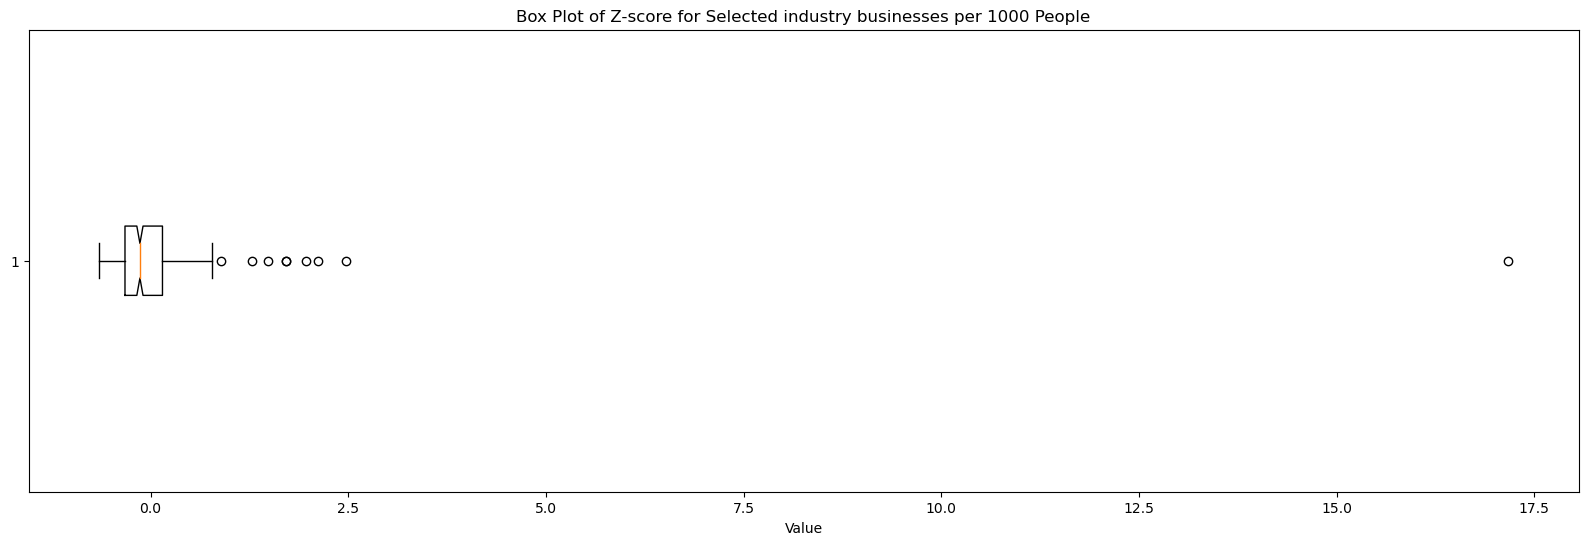

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
 
# Box plot
plt.figure(figsize=(20, 6))
plt.boxplot(business_data['z_business'], vert=False, notch=True)
plt.xlabel('Value')
plt.title('Box Plot of Z-score for Selected industry businesses per 1000 People')
plt.show()


### Stops Z-Score Boxplot

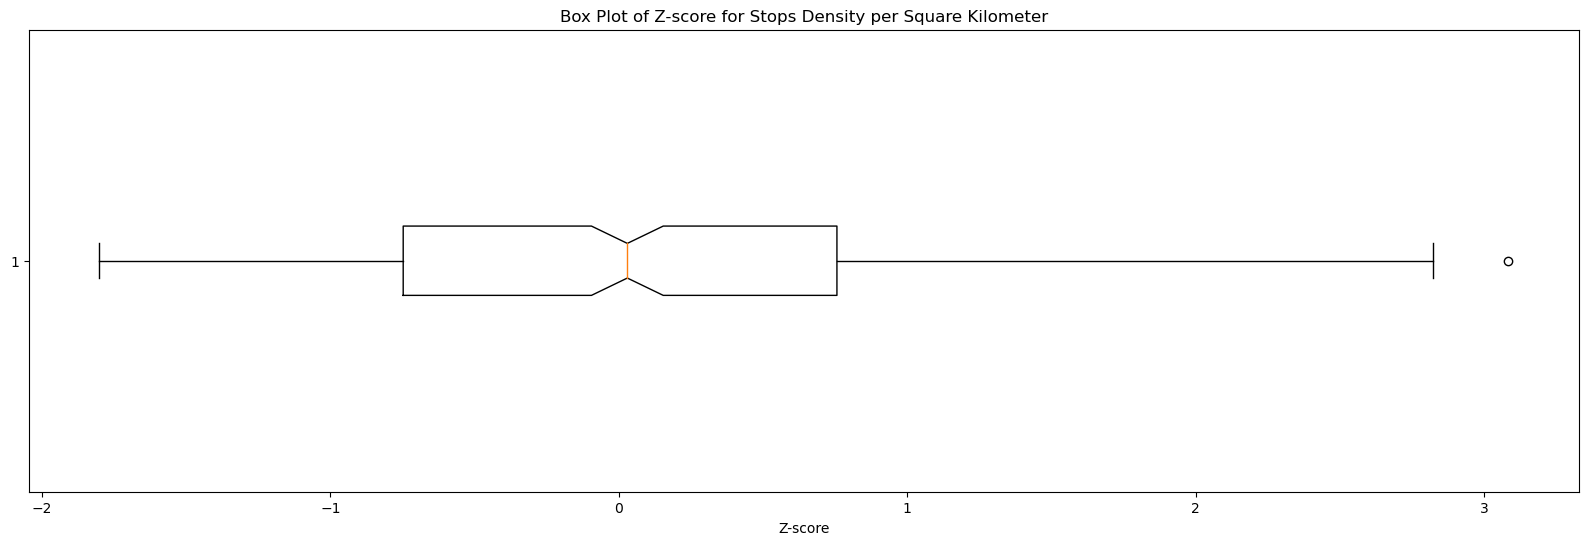

In [67]:
import matplotlib.pyplot as plt
 
# Box plot
plt.figure(figsize=(20, 6))
plt.boxplot(stops_data1['z_score'], vert=False, notch=True)
plt.xlabel('Z-score')
plt.title('Box Plot of Z-score for Stops Density per Square Kilometer')
plt.show()


### Polls Z-Score Boxplot

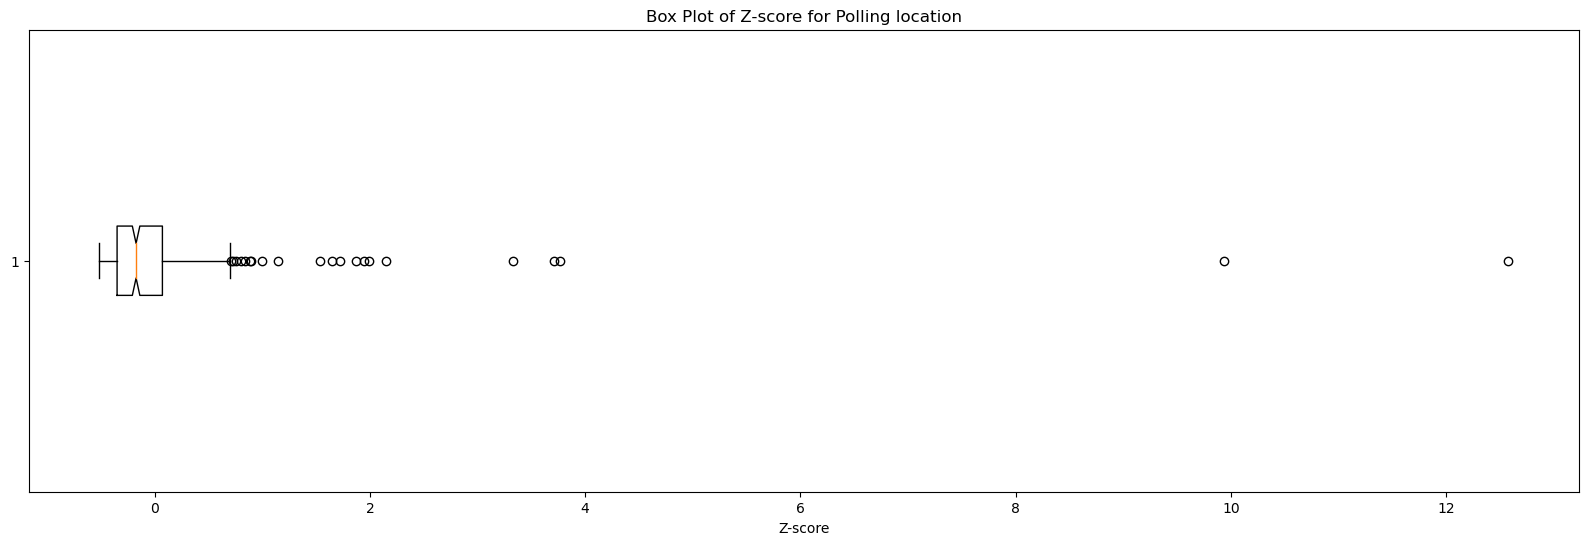

In [68]:
import matplotlib.pyplot as plt
 
# Box plot
plt.figure(figsize=(20, 6))
plt.boxplot(polls_data1['z_score'], vert=False, notch=True)
plt.xlabel('Z-score')
plt.title('Box Plot of Z-score for Polling location')
plt.show()


### Schools Z-Score Boxplot

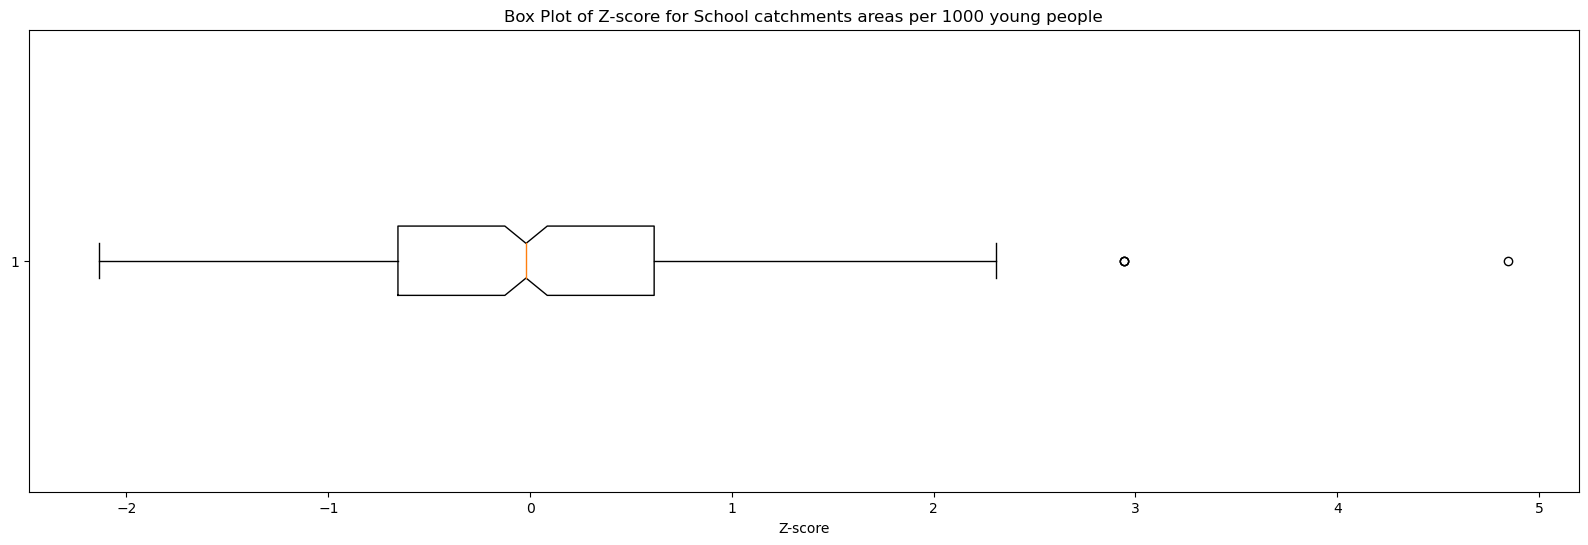

In [69]:
import matplotlib.pyplot as plt
# Box plot
plt.figure(figsize=(20, 6))
plt.boxplot(schools_data['z_score'], vert=False, notch=True)
plt.xlabel('Z-score')
plt.title('Box Plot of Z-score for School catchments areas per 1000 young people')
plt.show()


### Housing Z-Score Boxplot

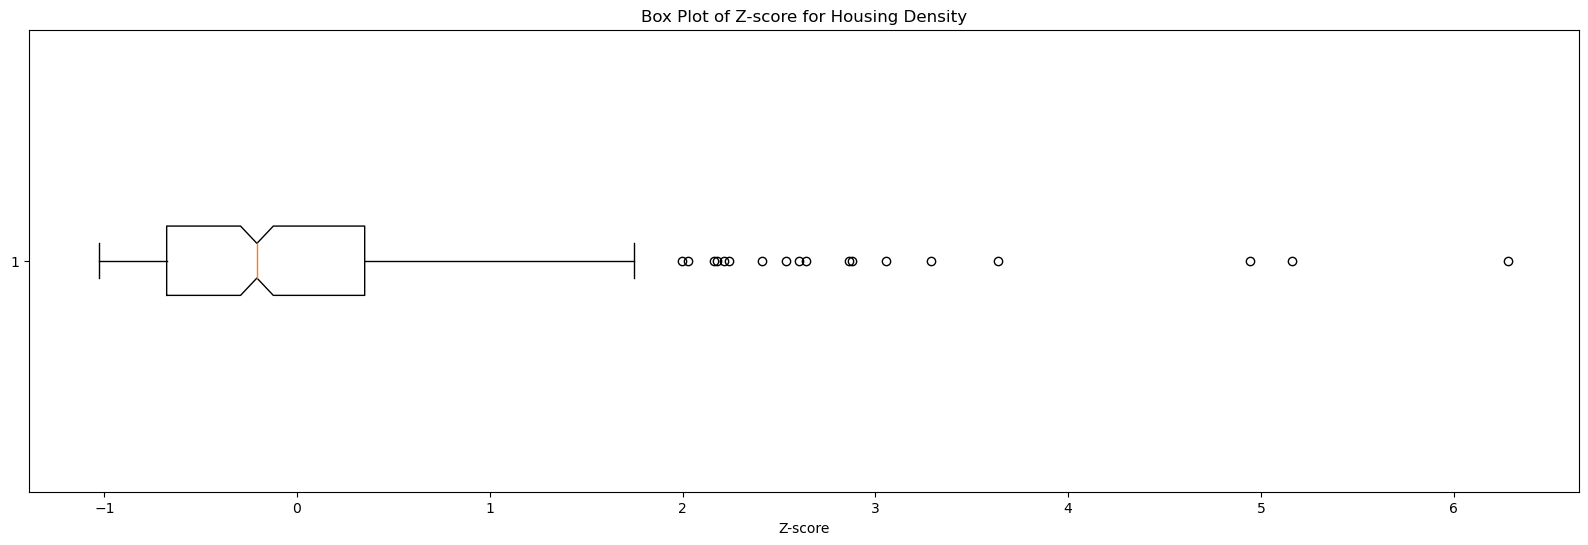

In [70]:
import matplotlib.pyplot as plt 
# Box plot
plt.figure(figsize=(20, 6))
plt.boxplot(housing_data['z_score'], vert=False, notch=True)
plt.xlabel('Z-score')
plt.title('Box Plot of Z-score for Housing Density')
plt.show()


### Clinics Z-Score Boxplot

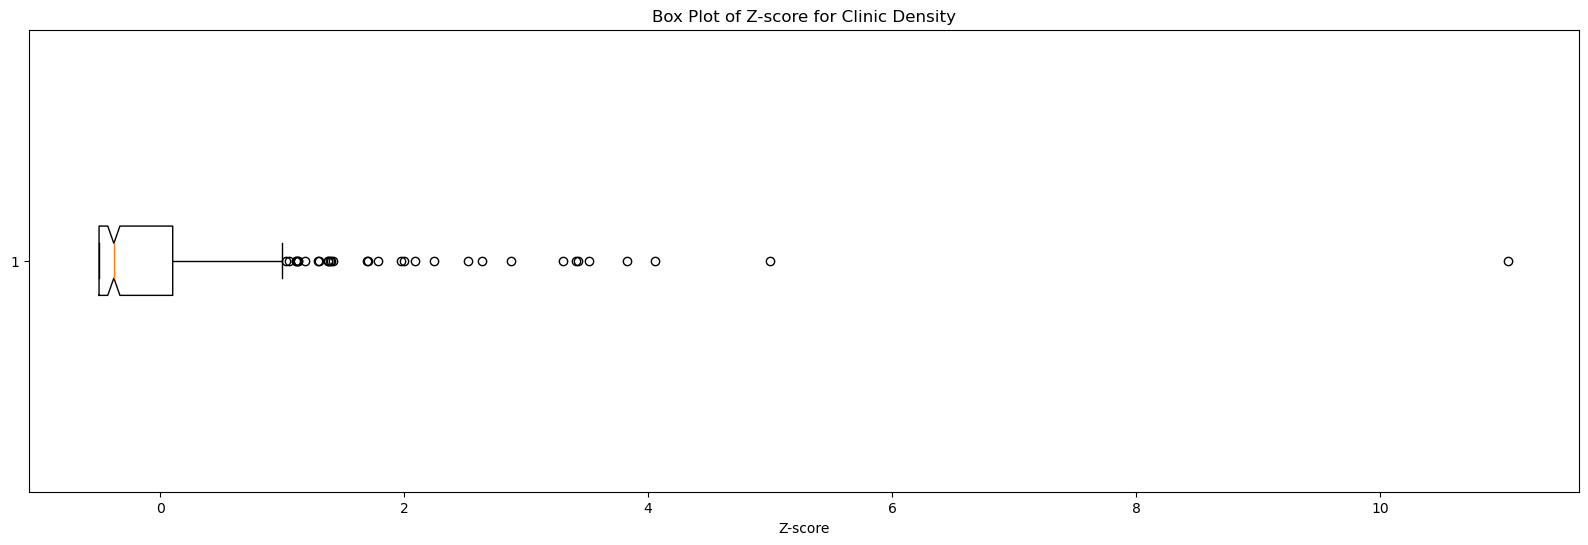

In [71]:
import matplotlib.pyplot as plt

# Box plot
plt.figure(figsize=(20, 6))
plt.boxplot(clinics_data['z_score'], vert=False, notch=True)
plt.xlabel('Z-score')
plt.title('Box Plot of Z-score for Clinic Density')
plt.show()

### Greater Sydney Z-Score Boxplot

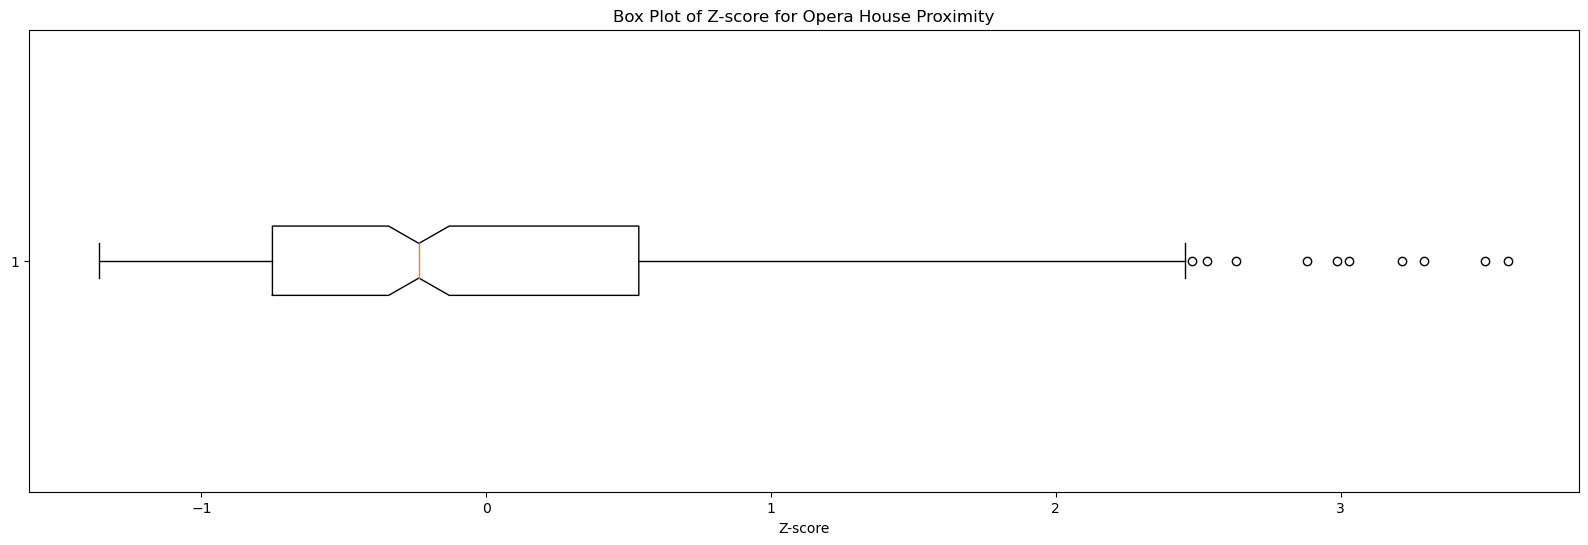

In [79]:
import matplotlib.pyplot as plt

# Box plot
plt.figure(figsize=(20, 6))
plt.boxplot(opera_house_proximity_data['z_score'], vert=False, notch=True)
plt.xlabel('Z-score')
plt.title('Box Plot of Z-score for Opera House Proximity')
plt.show()

## Scatter Plots

In [72]:
median_income = pd.read_sql_query("""
SELECT gsd.income.median_income
FROM gsd.income
JOIN gsd.population ON population.sa2_code = income.sa2_code;
""", conn)

/var/folders/n6/t2c1y9y15379hfk43zxdsj780000gn/T/ipykernel_76013/2351606873.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


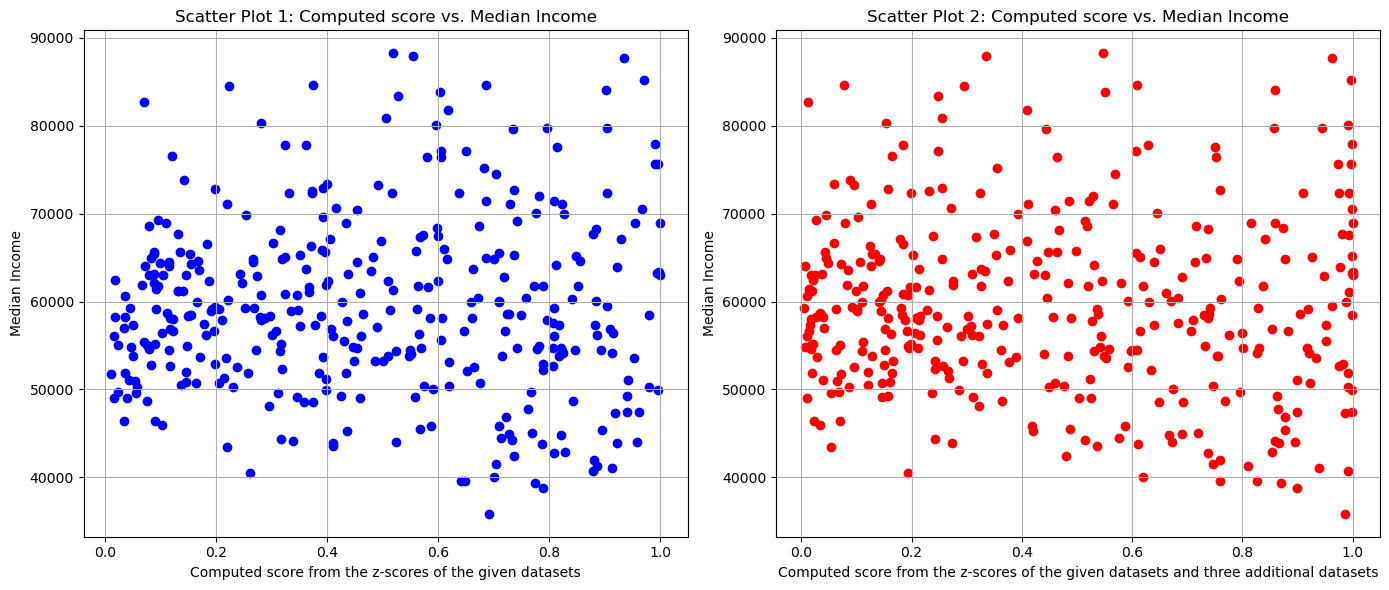

In [73]:
# Create two separate scatter plots
plt.figure(figsize=(14, 6))

# Scatter plot for score1
plt.subplot(1, 2, 1)
plt.scatter(score1, median_income, color='blue')
plt.title('Scatter Plot 1: Computed score vs. Median Income')
plt.xlabel('Computed score from the z-scores of the given datasets')
plt.ylabel('Median Income')
plt.tight_layout()
plt.grid(True)

# Scatter plot for score2
plt.subplot(1, 2, 2)
plt.scatter(score2, median_income, color='red')
plt.title('Scatter Plot 2: Computed score vs. Median Income')
plt.xlabel('Computed score from the z-scores of the given datasets and three additional datasets')
plt.ylabel('Median Income')
plt.tight_layout()
plt.grid(True)


### Statistical Test for Correlation Analysis

In [74]:
from scipy.stats import spearmanr

# Calculate Spearman correlation coefficient and p-value for score1 and score2 and median_income
corr_score1, p_value_score1 = spearmanr(score1, median_income)
corr_score2, p_value_score2 = spearmanr(score2, median_income)

# Print the Spearman correlation coefficients and p-values
print("Spearman correlation coefficient for score1 and median_income:", corr_score1)
print("P-value for score1 and median_income:", p_value_score1)
print()
print("Spearman correlation coefficient for score2 and median_income:", corr_score2)
print("P-value for score2 and median_income:", p_value_score2)

Spearman correlation coefficient for score1 and median_income: 0.004389566045363402
P-value for score1 and median_income: 0.9338539978141432

Spearman correlation coefficient for score2 and median_income: -0.046678346712959985
P-value for score2 and median_income: 0.377203496599012


## Conclusion

In [80]:
max_score_row = result_df2.loc[result_df2['score'].idxmax()]

# Extract the sa2_code from this row
sa2_code_with_max_score = max_score_row['sa2_name']

max_score = max_score_row['score']

print(f"The sa2_code with the highest score of {max_score} is: {sa2_code_with_max_score}")

The sa2_code with the highest score of 0.9999999999998876 is: Sydney (South) - Haymarket


In [81]:
min_score_row = result_df2.loc[result_df2['score'].idxmin()]

# Extract the sa2_code from this row
sa2_code_with_min_score = min_score_row['sa2_name']

min_score = min_score_row['score']

print(f"The sa2_code with the lowest score of {min_score} is: {sa2_code_with_min_score}")

The sa2_code with the lowest score of 0.004056062907056205 is: Bayview - Elanora Heights
